In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import pylab

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# set up file names and pathes
dataDir='/home/ubuntu/obj2text-neuraltalk2/coco-caption/coco-caption'
dataType='val2014'
algName = ['object_only_original', 'area_and_perimeter', 'area_and_width', 'CNN_and_Object_with_Area_and_Width']
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)

In [3]:
# continue set up file names and pathes

### object_only_original obj2text model with object length and width
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/%s.json'%(algName[0]), 'r') as f:
        object_only_original_results_unfiltered = json.load(f)                
object_only_original_results = object_only_original_results_unfiltered['val_predictions']
# save to file so that coco.loadRes works without error
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[0]), 'w') as f:
        json.dump(object_only_original_results, f)
object_only_original_results_resFile = '/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[0])


### model with object area and perimeter (in place of length and width)
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/%s.json'%(algName[1]), 'r') as f:
        area_and_perimeter_results_unfiltered = json.load(f)                
area_and_perimeter_results = area_and_perimeter_results_unfiltered['val_predictions']
# save to file so that coco.loadRes works without error
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[1]), 'w') as f:
        json.dump(area_and_perimeter_results, f)
area_and_perimeter_results_resFile = '/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[1])


### model with object area and width (in place of length and width)
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/%s.json'%(algName[2]), 'r') as f:
        area_and_width_results_unfiltered = json.load(f)                
area_and_width_results = area_and_width_results_unfiltered['val_predictions']
# save to file so that coco.loadRes works without error
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[2]), 'w') as f:
        json.dump(area_and_width_results, f)
area_and_width_results_resFile = '/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[2])


### CNN_and_Object_with_Area_and_Width obj2text model with object area and width (in place of length and width)
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/%s.json'%(algName[3]), 'r') as f:
        area_and_width_results_unfiltered = json.load(f)                
area_and_width_results = area_and_width_results_unfiltered['val_predictions']
# save to file so that coco.loadRes works without error
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[3]), 'w') as f:
        json.dump(area_and_width_results, f)
CNN_and_object_area_and_width_results_resFile = '/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName[3])


In [4]:
# create coco object and cocoRes objects
coco = COCO(annFile)

### object_only_original obj2text model with object length and width
object_only_original_cocoRes = coco.loadRes(object_only_original_results_resFile)

### model with object area and perimeter (in place of length and width)
area_and_perimeter_cocoRes = coco.loadRes(area_and_perimeter_results_resFile)

### model with object area and width (in place of length and width)
area_and_width_cocoRes = coco.loadRes(area_and_width_results_resFile)

### CNN_and_Object_with_Area_and_Width obj2text model with object area and width (in place of length and width)
CNN_and_object_area_and_width_cocoRes = coco.loadRes(CNN_and_object_area_and_width_results_resFile)

loading annotations into memory...
0:00:00.749907
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!


In [5]:
### object_only_original obj2text model with object length and width
print '***object_only_original obj2text Model***'
# create cocoEval object by taking coco and cocoRes
object_only_original_cocoEval = COCOEvalCap(coco, object_only_original_cocoRes)
# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
object_only_original_cocoEval.params['image_id'] = object_only_original_cocoRes.getImgIds()
# evaluate results
object_only_original_cocoEval.evaluate()
print ''


### model with object area and perimeter (in place of length and width)
print '***Area and Perimeter Model***'
# create cocoEval object by taking coco and cocoRes
area_and_perimeter_cocoEval = COCOEvalCap(coco, area_and_perimeter_cocoRes)
# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
area_and_perimeter_cocoEval.params['image_id'] = area_and_perimeter_cocoRes.getImgIds()
# evaluate results
area_and_perimeter_cocoEval.evaluate()
print ''


### model with object area and width (in place of length and width)
print '***Area and Width Model***'
# create cocoEval object by taking coco and cocoRes
area_and_width_cocoEval = COCOEvalCap(coco, area_and_width_cocoRes)
# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
area_and_width_cocoEval.params['image_id'] = area_and_width_cocoRes.getImgIds()
# evaluate results
area_and_width_cocoEval.evaluate()
print ''


### CNN_and_Object_with_Area_and_Width obj2text model with object area and width (in place of length and width)
print '***CNN_and_Object_with_Area_and_Width obj2text Model***'
# create cocoEval object by taking coco and cocoRes
CNN_and_object_area_and_width_cocoEval = COCOEvalCap(coco, CNN_and_object_area_and_width_cocoRes)
# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
CNN_and_object_area_and_width_cocoEval.params['image_id'] = CNN_and_object_area_and_width_cocoRes.getImgIds()
# evaluate results
CNN_and_object_area_and_width_cocoEval.evaluate()
print ''

***object_only_original obj2text Model***
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 30802, 'guess': [31106, 27906, 24706, 21506], 'testlen': 31106, 'correct': [21051, 10159, 4344, 1871]}
ratio: 1.00986948899
Bleu_1: 0.677
Bleu_2: 0.496
Bleu_3: 0.351
Bleu_4: 0.248
computing METEOR score...
METEOR: 0.227
computing Rouge score...
ROUGE_L: 0.496
computing CIDEr score...
CIDEr: 0.832

***Area and Perimeter Model***
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 31160, 'guess': [31584, 28384, 25184, 21984], 'testlen': 31584, 'correct': [21253, 10138, 4283, 1813]}
ratio: 1.0136071887
Bleu_1: 0.673
Bleu_2: 0.490
Bleu_3: 0.344
Bleu_4: 0.241
computing METEOR score...
METEOR: 0.226
computing Rouge score...
ROUGE_L: 0.494
computing CIDEr score...
CIDEr: 0.813

***Area and Width Model***
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 31063, 'guess': [31408, 28208, 25008, 21808], 'testlen': 31408, 'correct': [21225, 1

In [6]:
### object_only_original obj2text model with object length and width
print '***object_only_original obj2text Model***'
# print output evaluation scores
for metric, score in object_only_original_cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)
print ''   
 

### model with object area and perimeter (in place of length and width)
print '***Area and Perimeter Model***'
# print output evaluation scores
for metric, score in area_and_perimeter_cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)
print ''
    
    
### model with object area and width (in place of length and width)
print '***Area and Width Model***'
# print output evaluation scores
for metric, score in area_and_width_cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)
print ''


### CNN_and_Object_with_Area_and_Width obj2text model with object area and width (in place of length and width)
print '***CNN_and_Object_with_Area_and_Width obj2text Model***'
# print output evaluation scores
for metric, score in CNN_and_object_area_and_width_cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)
print ''

***object_only_original obj2text Model***
CIDEr: 0.832
Bleu_4: 0.248
Bleu_3: 0.351
Bleu_2: 0.496
Bleu_1: 0.677
ROUGE_L: 0.496
METEOR: 0.227

***Area and Perimeter Model***
CIDEr: 0.813
Bleu_4: 0.241
Bleu_3: 0.344
Bleu_2: 0.490
Bleu_1: 0.673
ROUGE_L: 0.494
METEOR: 0.226

***Area and Width Model***
CIDEr: 0.817
Bleu_4: 0.246
Bleu_3: 0.348
Bleu_2: 0.494
Bleu_1: 0.676
ROUGE_L: 0.495
METEOR: 0.226

***CNN_and_Object_with_Area_and_Width obj2text Model***
CIDEr: 0.858
Bleu_4: 0.261
Bleu_3: 0.364
Bleu_2: 0.509
Bleu_1: 0.687
ROUGE_L: 0.504
METEOR: 0.232



In [7]:
# Get comparative word counts from the models

# test_words = {'behind': 0, 'in front of': 0, 'back': 0, 'background': 0, 'next to': 0,
#                              'beside': 0, 'ahead': 0, 'bigger': 0, 'smaller': 0, 'larger': 0, 'baby': 0, 'wider': 0,
#                              'taller': 0, 'longer': 0, 'shorter': 0, 'short': 0, 'big': 0, 'tall': 0, 'small': 0,
#               'large': 0, 'wide': 0, 'skinny': 0, 'before': 0, 'after': 0}

test_words = {'behind': 0, 'front': 0, 'back': 0, 'background': 0, 'bigger': 0, 'larger': 0,
              'baby': 0, 'big': 0, 'short': 0, 'small': 0, 'tall': 0, 'large': 0}

### object_only_original obj2text model with object length and width
object_only_original_word_counts = test_words.copy()
for key, value in object_only_original_cocoRes.anns.iteritems():
    for word in test_words.keys():
        if word in value['caption']:
            object_only_original_word_counts[word] += 1            
print object_only_original_word_counts


### model with object area and perimeter (in place of length and width)
area_and_perimeter_word_counts = test_words.copy()
for key, value in area_and_perimeter_cocoRes.anns.iteritems():
    for word in test_words.keys():
        if word in value['caption']:
            area_and_perimeter_word_counts[word] += 1            
print area_and_perimeter_word_counts


### model with object area and width (in place of length and width)
area_and_width_word_counts = test_words.copy()
for key, value in area_and_width_cocoRes.anns.iteritems():
    for word in test_words.keys():
        if word in value['caption']:
            area_and_width_word_counts[word] += 1            
print area_and_width_word_counts


### CNN_and_Object_with_Area_and_Width obj2text model with object area and width (in place of length and width)
CNN_and_Object_with_Area_and_Width_word_counts = test_words.copy()
for key, value in CNN_and_object_area_and_width_cocoRes.anns.iteritems():
    for word in test_words.keys():
        if word in value['caption']:
            CNN_and_Object_with_Area_and_Width_word_counts[word] += 1            
print CNN_and_Object_with_Area_and_Width_word_counts

{'short': 3, 'big': 0, 'larger': 3, 'back': 116, 'large': 109, 'baby': 15, 'behind': 1, 'background': 80, 'tall': 11, 'front': 143, 'small': 11, 'bigger': 0}
{'short': 9, 'big': 0, 'larger': 2, 'back': 147, 'large': 121, 'baby': 14, 'behind': 1, 'background': 110, 'tall': 19, 'front': 125, 'small': 7, 'bigger': 0}
{'short': 4, 'big': 2, 'larger': 0, 'back': 82, 'large': 111, 'baby': 19, 'behind': 1, 'background': 48, 'tall': 3, 'front': 123, 'small': 2, 'bigger': 2}
{'short': 1, 'big': 4, 'larger': 0, 'back': 109, 'large': 89, 'baby': 18, 'behind': 2, 'background': 71, 'tall': 18, 'front': 109, 'small': 7, 'bigger': 4}


In [8]:
word_count_averages = test_words.copy()
for key, value in word_count_averages.iteritems():
    word_count_averages[key] = np.mean([object_only_original_word_counts[key], area_and_perimeter_word_counts[key],
                                        area_and_width_word_counts[key],
                                        CNN_and_Object_with_Area_and_Width_word_counts[key]])
        
sorted_word_count_averages = sorted(word_count_averages, key=word_count_averages.__getitem__)

width: 0.2125
model: objects_only_original
counts: {'short': 3, 'big': 0, 'larger': 3, 'back': 116, 'large': 109, 'baby': 15, 'behind': 1, 'background': 80, 'tall': 11, 'front': 143, 'small': 11, 'bigger': 0}
[-0.26, 0.74, 1.74, 2.74, 3.74, 4.74, 5.74, 6.74, 7.74, 8.74, 9.74, 10.74]
model: objects_only_area_and_perimeter
counts: {'short': 9, 'big': 0, 'larger': 2, 'back': 147, 'large': 121, 'baby': 14, 'behind': 1, 'background': 110, 'tall': 19, 'front': 125, 'small': 7, 'bigger': 0}
[-0.047500000000000014, 0.9525, 1.9525, 2.9525, 3.9525, 4.952500000000001, 5.952500000000001, 6.952500000000001, 7.952500000000001, 8.9525, 9.9525, 10.9525]
model: objects_only_area_and_width
counts: {'short': 4, 'big': 2, 'larger': 0, 'back': 82, 'large': 111, 'baby': 19, 'behind': 1, 'background': 48, 'tall': 3, 'front': 123, 'small': 2, 'bigger': 2}
[0.16499999999999998, 1.165, 2.165, 3.165, 4.165, 5.165, 6.165, 7.165, 8.165000000000001, 9.165000000000001, 10.165000000000001, 11.165000000000001]
model: 

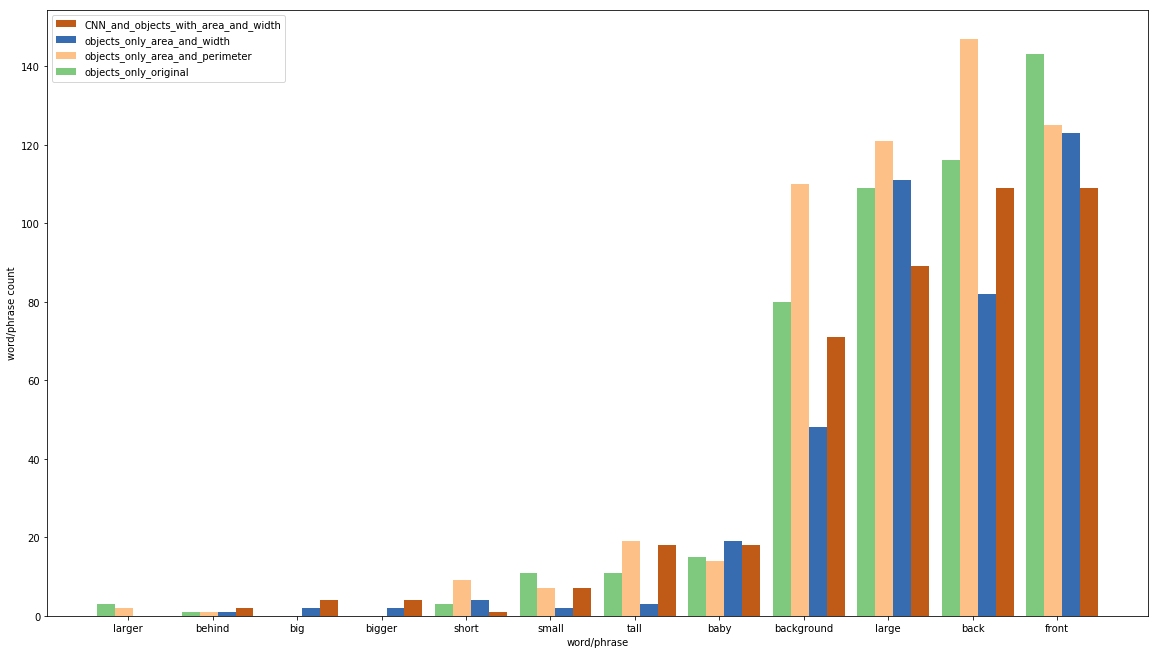

In [9]:
pylab.rcParams['figure.figsize'] = (16.0, 9.0)

# Plot word counts by model
word_counts = [object_only_original_word_counts, area_and_perimeter_word_counts, area_and_width_word_counts,
              CNN_and_Object_with_Area_and_Width_word_counts]

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.15

models = ['objects_only_original', 'objects_only_area_and_perimeter', 'objects_only_area_and_width', 'CNN_and_objects_with_area_and_width']
words = sorted_word_count_averages

n = len(models)

width = (1 - space) / (len(models))
print "width:", width

for i, (model, counts) in enumerate(zip(models, word_counts)):
    print "model:", model
    print "counts:", counts
    vals = [counts[w] for w in sorted_word_count_averages]
    pos = [j - (.67 - space) / 2. + i * width for j in range(0,len(words))]
    print pos
    ax.bar(pos, vals, width=width, label=model, color=plt.cm.Accent(float(i) / n))
    
#ax.set_xticks(words)
#ax.set_xticklabels(words)
#plt.setp(plt.xticks(), rotation=90)

plt.xticks(range(len(words)), words)

#print(plt.xticks())

plt.tight_layout()

ax.set_ylabel("word/phrase count")
ax.set_xlabel("word/phrase")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

In [13]:
interesting_images = []

for new_value, old_value in zip(area_and_perimeter_cocoRes.anns.itervalues(), object_only_original_cocoRes.anns.itervalues()):
    for word in test_words.keys():
        if (word in new_value['caption']) and (word not in old_value['caption']):
            interesting_images.append(new_value['image_id'])
            


In [10]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<.5]
print 'length of evals', len(evals)
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('/home/ubuntu/obj2text-neuraltalk2/coco/images/%s/%s'%(dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

NameError: name 'cocoEval' is not defined

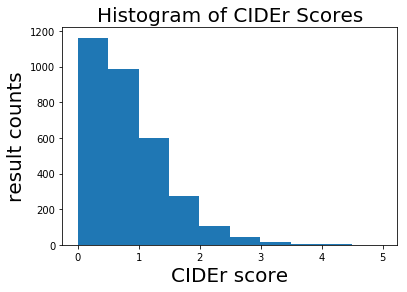

In [8]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()